<a href="https://colab.research.google.com/github/Adityawavre/30julylab/blob/main/ML_MINI_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

# 4. Check the DataFrame
print(df.head())  # Show the first few rows
print(df.isnull().sum())  # Count missing values in each column
print(np.isinf(df.select_dtypes(include=[np.number])).sum())  # Count infinite values in numeric columns

df.smoking_status.unique()  # Show unique values in the 'smoking_status' column


      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
id                     0
gender                 0
age   

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [2]:
# Drop the 'id' column
df = df.drop('id', axis=1)

# Remove rows where the 'gender' column has the value 'Other'
df = df[df['gender'] != 'Other']

# Convert categorical variables to numeric codes
df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1})
df['ever_married'] = df['ever_married'].replace({'No': 0, 'Yes': 1})
df['work_type'] = df['work_type'].replace({
    'Private': 0,
    'Self-employed': 1,
    'Govt_job': 2,
    'children': 3,
    'Never_worked': 4
})
df['Residence_type'] = df['Residence_type'].replace({'Urban': 0, 'Rural': 1})
df['smoking_status'] = df['smoking_status'].replace({
    'never smoked': 0,
    'formerly smoked': 1,
    'Unknown': 2,
    'smokes': 3
})

# Fill missing values in the 'bmi' column with the column's mean
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

# Display the first 10 rows of the modified DataFrame
df.head(10)


/tmp/ipython-input-3476176997.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1})
/tmp/ipython-input-3476176997.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ever_married'] = df['ever_married'].replace({'No': 0, 'Yes': 1})
/tmp/ipython-input-3476176997.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the fut

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,0,228.69,36.60000,1,1
1,1,61.0,0,0,1,1,1,202.21,28.89456,0,1
2,0,80.0,0,1,1,0,1,105.92,32.50000,0,1
3,1,49.0,0,0,1,0,0,171.23,34.40000,3,1
4,1,79.0,1,0,1,1,1,174.12,24.00000,0,1
5,0,81.0,0,0,1,0,0,186.21,29.00000,1,1
6,0,74.0,1,1,1,0,1,70.09,27.40000,0,1
7,1,69.0,0,0,0,0,0,94.39,22.80000,0,1
8,1,59.0,0,0,1,0,1,76.15,28.89456,2,1
9,1,78.0,0,0,1,0,0,58.57,24.20000,2,1


In [3]:
from scipy import stats

# Filter out rows where smoking status is 'Unknown' (value 2)
df_known = df[df['smoking_status'] != 2].copy()

print("--- Hypothesis Test: Is 'Smoking Status' related to 'Stroke Occurrence'? ---")
print("\nHypotheses:")
print("H0 (Null Hypothesis): Smoking status and stroke occurrence are independent (no association).")
print("H1 (Alternative Hypothesis): Smoking status and stroke occurrence are not independent (there is an association).\n")

# Map numeric smoking status to readable labels
smoking_status_map = {0: 'never smoked', 1: 'formerly smoked', 3: 'smokes'}
df_known['smoking_status_label'] = df_known['smoking_status'].map(smoking_status_map)

# Create a contingency table of observed frequencies
contingency_table = pd.crosstab(df_known['smoking_status_label'], df_known['stroke'])

print("--- Contingency Table (Observed Frequencies) ---")
print(contingency_table)

# Perform Chi-squared test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("\n--- Chi-Squared Test Result ---")
print(f"Chi-squared statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the result
print("\n--- Final Conclusion ---")
alpha = 0.05  # Significance level 5%
if p_value < alpha:
    print(f"P-value ({p_value:.4f}) is less than the significance level ({alpha}), so we reject the null hypothesis.")
    print("Conclusion: There is a statistically significant association between smoking status and stroke occurrence.")
else:
    print(f"P-value ({p_value:.4f}) is greater than the significance level ({alpha}), so we fail to reject the null hypothesis.")
    print("Conclusion: There is no statistically significant association between smoking status and stroke occurrence.")


--- Hypothesis Test: Is 'Smoking Status' related to 'Stroke Occurrence'? ---

Hypotheses:
H0 (Null Hypothesis): Smoking status and stroke occurrence are independent (no association).
H1 (Alternative Hypothesis): Smoking status and stroke occurrence are not independent (there is an association).

--- Contingency Table (Observed Frequencies) ---
stroke                   0   1
smoking_status_label          
formerly smoked        814  70
never smoked          1802  90
smokes                 747  42

--- Chi-Squared Test Result ---
Chi-squared statistic: 11.4906
P-value: 0.0032

--- Final Conclusion ---
P-value (0.0032) is less than the significance level (0.05), so we reject the null hypothesis.
Conclusion: There is a statistically significant association between smoking status and stroke occurrence.


In [4]:
# Store rows where 'smoking_status' is 2 (Unknown) in df_unknown
df_unknown = df[df['smoking_status'] == 2]

# Store rows where 'smoking_status' is not 2 in df_known
df_known = df[df['smoking_status'] != 2]


--- 1. Descriptive Statistics of df_known ---
       gender     age  hypertension  heart_disease  ever_married  work_type  \
count 3565.00 3565.00       3565.00        3565.00       3565.00    3565.00   
mean     0.61   48.86          0.13           0.06          0.76       0.56   
std      0.49   18.87          0.33           0.24          0.43       0.84   
min      0.00   10.00          0.00           0.00          0.00       0.00   
25%      0.00   34.00          0.00           0.00          1.00       0.00   
50%      1.00   50.00          0.00           0.00          1.00       0.00   
75%      1.00   63.00          0.00           0.00          1.00       1.00   
max      1.00   82.00          1.00           1.00          1.00       4.00   

       Residence_type  avg_glucose_level     bmi  smoking_status  stroke  
count         3565.00            3565.00 3565.00         3565.00 3565.00  
mean             0.49             108.97   30.24            0.91    0.06  
std              

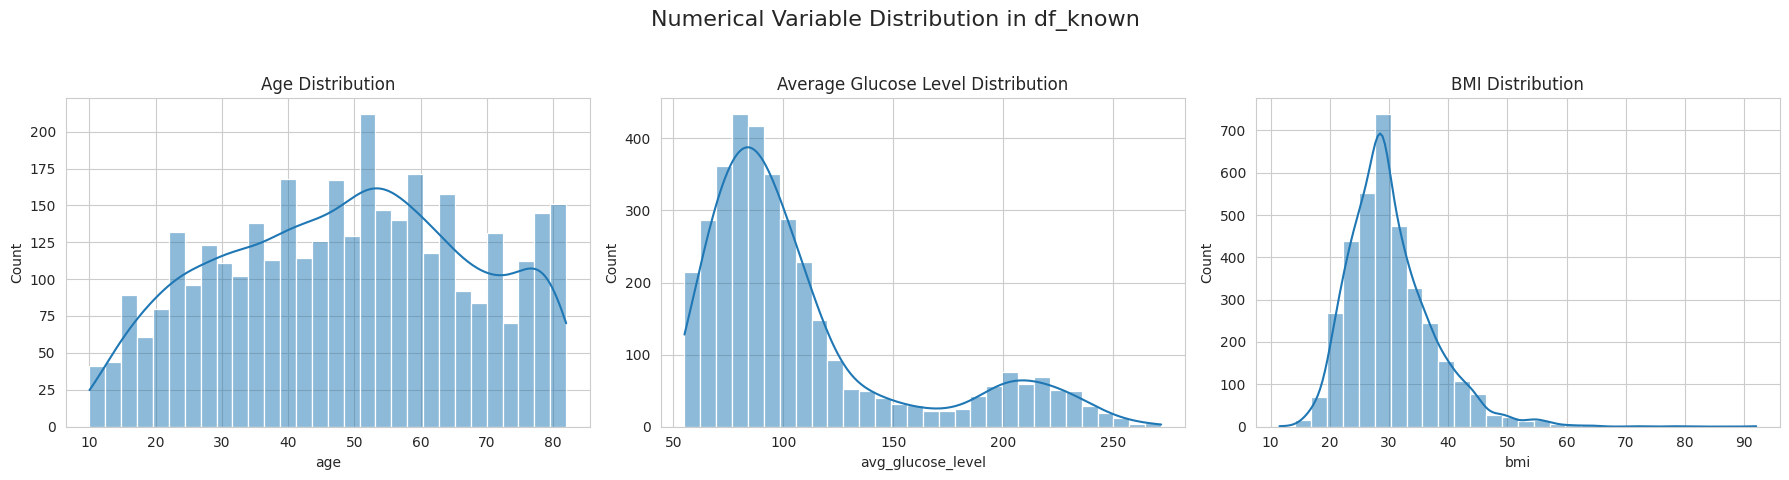

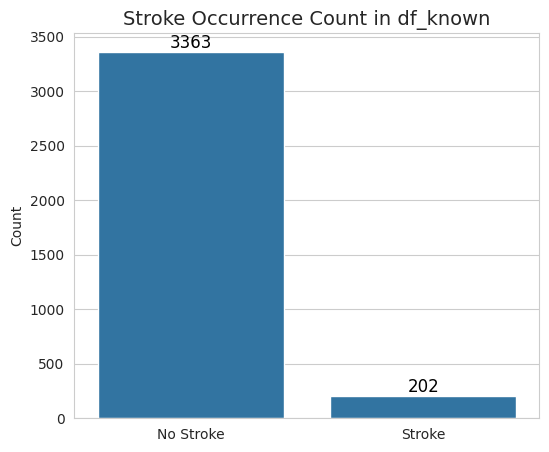



--- 3. Stroke Rate by Smoking Status ---


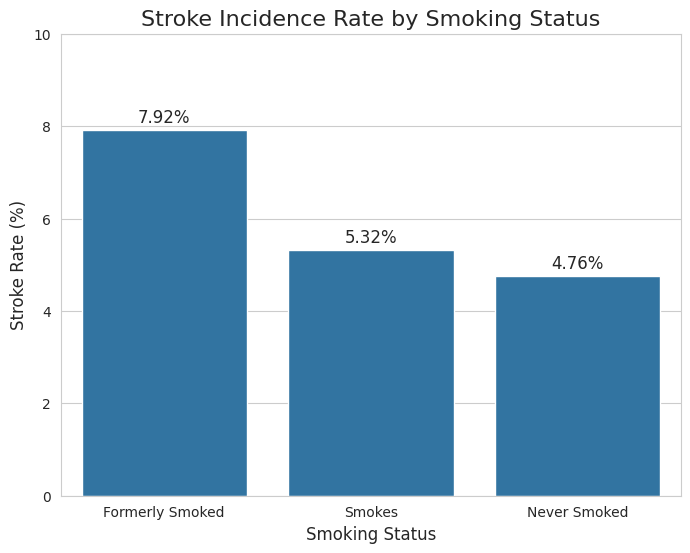



--- 4. Correlation Analysis ---
Correlation with 'stroke':
stroke               1.00
age                  0.25
hypertension         0.13
heart_disease        0.13
avg_glucose_level    0.13
ever_married         0.08
smoking_status       0.01
bmi                  0.01
Residence_type      -0.01
work_type           -0.01
gender              -0.02
Name: stroke, dtype: float64


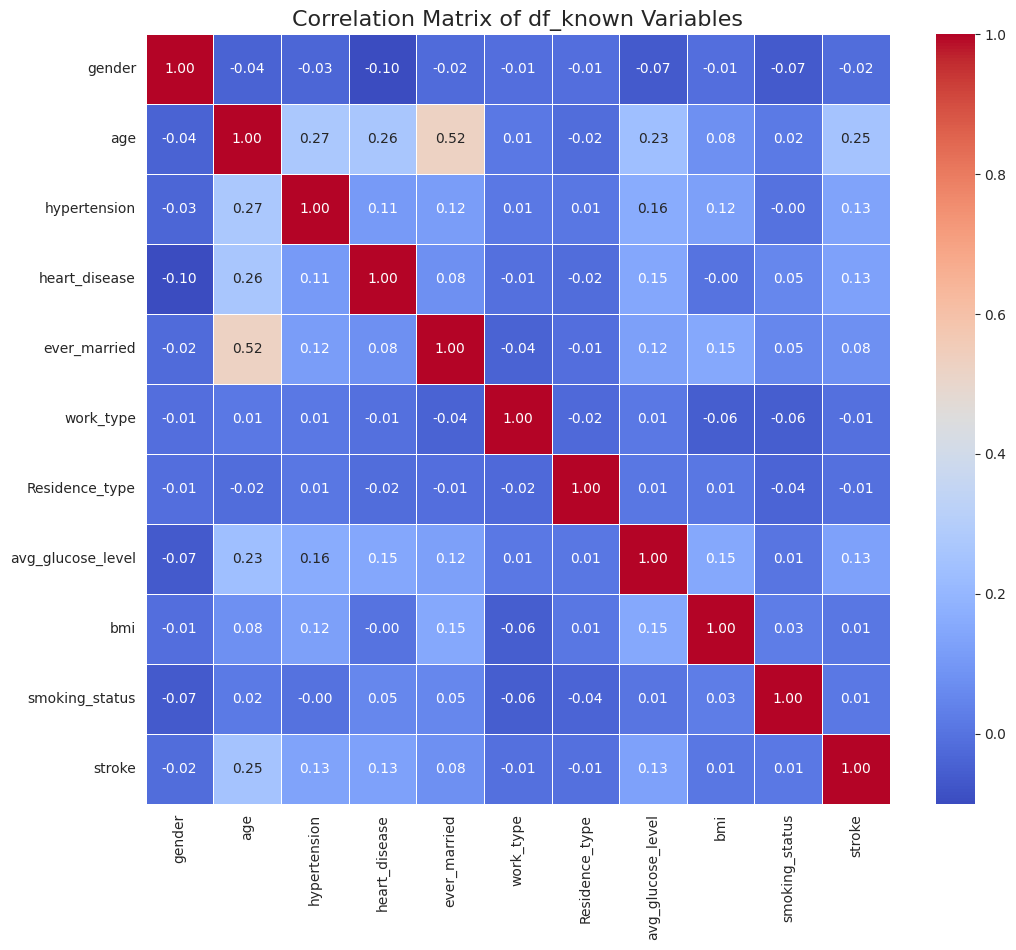

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# --- Analysis 1: Descriptive Statistics ---
print("--- 1. Descriptive Statistics of df_known ---")
pd.set_option('display.float_format', lambda x: f'{x:.2f}')  # Format floats to 2 decimal places
print(df_known.describe())  # Display summary statistics for numeric columns
print("\n" + "="*50 + "\n")

# --- Analysis 2: Data Distribution Visualization ---
print("--- 2. Data Visualization ---")
sns.set_style("whitegrid")  # Set seaborn style

# (a) Distribution of numerical variables (Histograms)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Numerical Variable Distribution in df_known', fontsize=16)

sns.histplot(df_known['age'], kde=True, ax=axes[0], bins=30)
axes[0].set_title('Age Distribution')

sns.histplot(df_known['avg_glucose_level'], kde=True, ax=axes[1], bins=30)
axes[1].set_title('Average Glucose Level Distribution')

sns.histplot(df_known['bmi'], kde=True, ax=axes[2], bins=30)
axes[2].set_title('BMI Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
plt.show()

# (b) Stroke occurrence count (Count Plot)
plt.figure(figsize=(6, 5))
sns.countplot(data=df_known, x='stroke')
plt.title('Stroke Occurrence Count in df_known', fontsize=14)
plt.xticks([0, 1], ['No Stroke', 'Stroke'])  # Rename x-axis labels
plt.ylabel('Count')
plt.xlabel('')

# Add count annotations on top of bars
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), f'{int(p.get_height())}',
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# --- Analysis 3: Stroke Rate by Smoking Status ---
print("\n" + "="*50 + "\n")
print("--- 3. Stroke Rate by Smoking Status ---")

# Calculate stroke rate for each smoking status group
stroke_rate_by_smoking = df_known.groupby('smoking_status')['stroke'].mean() * 100

# Map numeric codes back to labels
smoking_status_labels = {0: 'Never Smoked', 1: 'Formerly Smoked', 3: 'Smokes'}
stroke_rate_by_smoking.index = stroke_rate_by_smoking.index.map(smoking_status_labels)

# Prepare for bar plot
plot_data = stroke_rate_by_smoking.sort_values(ascending=False).reset_index()
plot_data.columns = ['Smoking Status', 'Stroke Rate (%)']

# Plot bar chart
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=plot_data, x='Smoking Status', y='Stroke Rate (%)')
ax.set_title('Stroke Incidence Rate by Smoking Status', fontsize=16)
ax.set_xlabel('Smoking Status', fontsize=12)
ax.set_ylabel('Stroke Rate (%)', fontsize=12)
ax.set_ylim(0, 10)

# Add percentage labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=12)
plt.show()

# --- Analysis 4: Correlation Analysis ---
print("\n" + "="*50 + "\n")
print("--- 4. Correlation Analysis ---")

# Compute correlation matrix
correlation_matrix = df_known.corr()

# Print correlations with respect to the 'stroke' column
print("Correlation with 'stroke':")
print(correlation_matrix['stroke'].sort_values(ascending=False))

# Plot full correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of df_known Variables', fontsize=16)
plt.show()


In [6]:
# Create a new DataFrame from df_unknown, dropping the 'smoking_status' column
df_unknown_analysis = df_unknown.drop('smoking_status', axis=1)


In [7]:
print("--- 1. Descriptive Statistics of df_unknown ---")

# Set float format for better readability
pd.set_option('display.float_format', lambda x: f'{x:.2f}')

# Show basic statistics (mean, std, min, max, etc.)
descriptive_stats_unknown = df_unknown_analysis.describe()
print(descriptive_stats_unknown)
print("\n" + "="*50 + "\n")


--- 1. Descriptive Statistics of df_unknown ---
       gender     age  hypertension  heart_disease  ever_married  work_type  \
count 1544.00 1544.00       1544.00        1544.00       1544.00    1544.00   
mean     0.54   30.23          0.03           0.03          0.42       1.48   
std      0.50   25.06          0.18           0.17          0.49       1.38   
min      0.00    0.08          0.00           0.00          0.00       0.00   
25%      0.00    8.00          0.00           0.00          0.00       0.00   
50%      1.00   23.00          0.00           0.00          0.00       1.00   
75%      1.00   51.00          0.00           0.00          1.00       3.00   
max      1.00   82.00          1.00           1.00          1.00       4.00   

       Residence_type  avg_glucose_level     bmi  stroke  
count         1544.00            1544.00 1544.00 1544.00  
mean             0.49              99.60   25.79    0.03  
std              0.50              36.61    8.01    0.17  
min 

In [8]:
print("--- 2. Data Visualization for df_unknown ---")
sns.set_style("whitegrid")  # Set Seaborn style

--- 2. Data Visualization for df_unknown ---


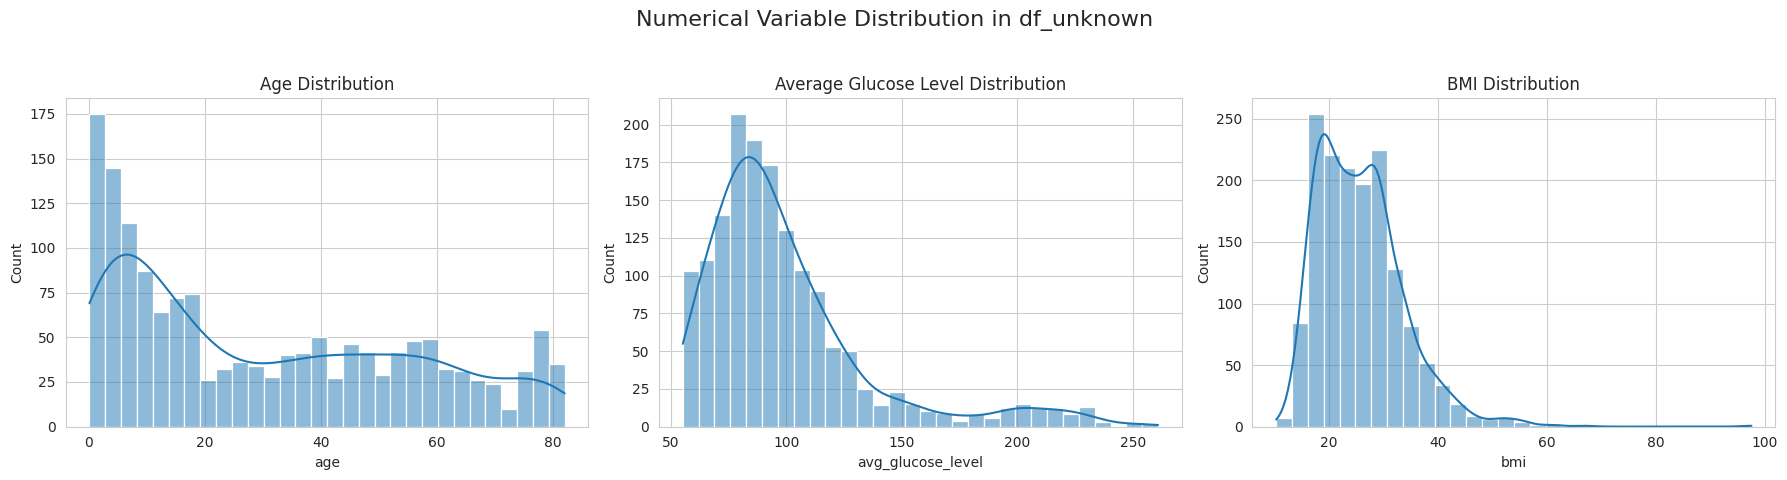

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Numerical Variable Distribution in df_unknown', fontsize=16)

# Plot histograms with KDE (smooth curve)
sns.histplot(df_unknown_analysis['age'], kde=True, ax=axes[0], bins=30)
axes[0].set_title('Age Distribution')

sns.histplot(df_unknown_analysis['avg_glucose_level'], kde=True, ax=axes[1], bins=30)
axes[1].set_title('Average Glucose Level Distribution')

sns.histplot(df_unknown_analysis['bmi'], kde=True, ax=axes[2], bins=30)
axes[2].set_title('BMI Distribution')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


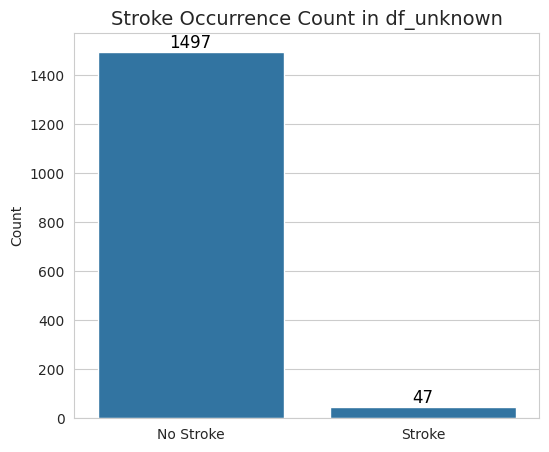

In [10]:
plt.figure(figsize=(6, 5))
sns.countplot(data=df_unknown_analysis, x='stroke')  # Bar plot for stroke
plt.title('Stroke Occurrence Count in df_unknown', fontsize=14)
plt.xticks([0, 1], ['No Stroke', 'Stroke'])  # Label the x-axis
plt.ylabel('Count')
plt.xlabel('')

# Add text labels above bars
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), f'{int(p.get_height())}',
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()


In [11]:
print("\n" + "="*50 + "\n")
print("--- 3. Correlation Analysis for df_unknown ---")

# Calculate correlation matrix
correlation_matrix_unknown = df_unknown_analysis.corr()

# Display correlation of all variables with 'stroke'
stroke_correlation_unknown = correlation_matrix_unknown['stroke'].sort_values(ascending=False)
print("Correlation with 'stroke':")
print(stroke_correlation_unknown)




--- 3. Correlation Analysis for df_unknown ---
Correlation with 'stroke':
stroke               1.00
age                  0.25
ever_married         0.15
heart_disease        0.14
avg_glucose_level    0.12
bmi                  0.07
hypertension         0.05
gender              -0.00
Residence_type      -0.04
work_type           -0.11
Name: stroke, dtype: float64


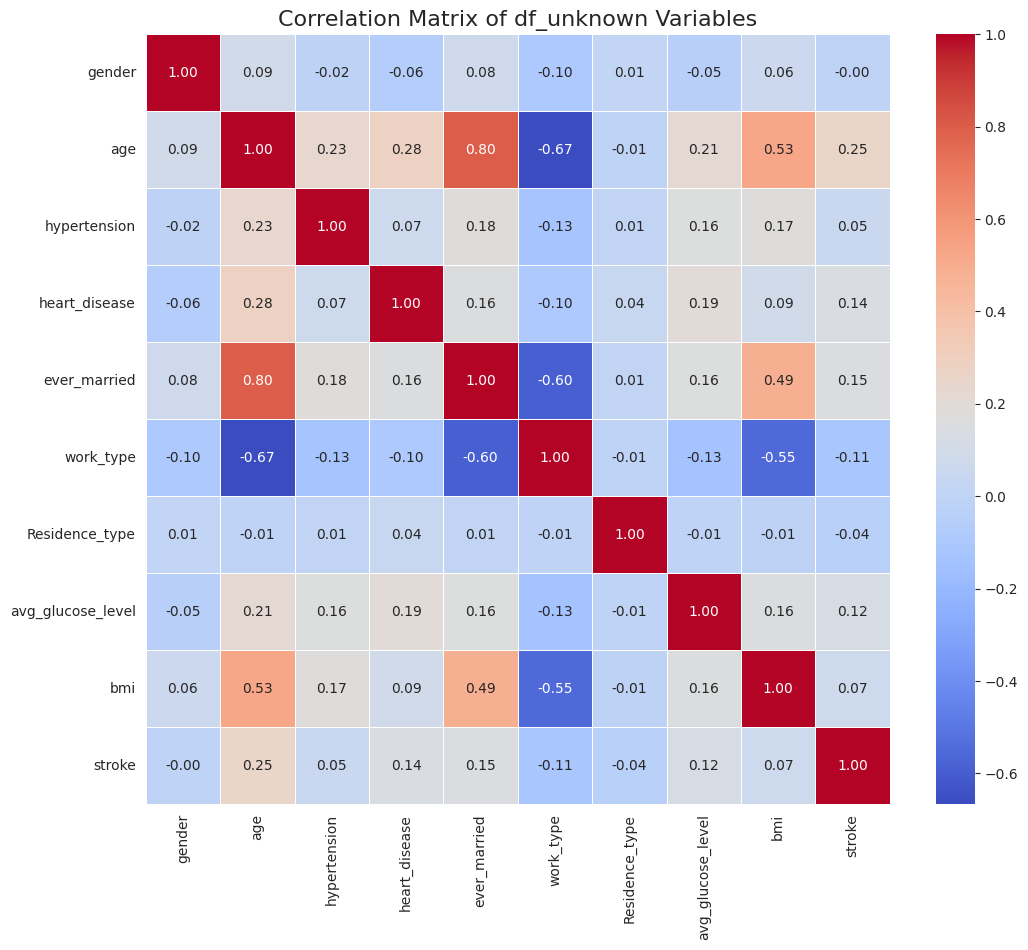

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_unknown, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of df_unknown Variables', fontsize=16)
plt.show()


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)

# Load the dataset
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

# --- Data Cleaning and Encoding ---

# Drop the 'id' column (not useful for prediction)
df = df.drop('id', axis=1)

# Remove rows where 'gender' is 'Other' (very rare category)
df = df[df['gender'] != 'Other']

# Convert categorical values to numeric (Label Encoding)
df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1})
df['ever_married'] = df['ever_married'].replace({'No': 0, 'Yes': 1})
df['work_type'] = df['work_type'].replace({
    'Private': 0,
    'Self-employed': 1,
    'Govt_job': 2,
    'children': 3,
    'Never_worked': 4
})
df['Residence_type'] = df['Residence_type'].replace({'Urban': 0, 'Rural': 1})
df['smoking_status'] = df['smoking_status'].replace({
    'never smoked': 0,
    'formerly smoked': 1,
    'Unknown': 2,
    'smokes': 3
})

# Fill missing values in the 'bmi' column with the mean
df['bmi'].fillna(df['bmi'].mean(), inplace=True)


# --- Handle unknown smoking_status ---

# Separate rows where smoking_status is unknown
df_unknown = df[df['smoking_status'] == 2]
df_known = df[df['smoking_status'] != 2]

# Among unknowns, separate by age
# If age is less than 20, assume never smoked
df_unknown_under20 = df_unknown[df_unknown['age'] < 20].copy()
df_unknown_under20['smoking_status'] = 0

# If age >= 20, predict smoking status using a model
df_unknown_over20 = df_unknown[df_unknown['age'] >= 20].copy()

if not df_unknown_over20.empty:
    # Use all features except target and smoking_status
    features_for_smoking_model = [
        col for col in df_known.columns
        if col not in ['stroke', 'smoking_status']
    ]

    # Train model to predict smoking_status
    X_known = df_known[features_for_smoking_model]
    y_known = df_known['smoking_status']

    smoking_model = RandomForestClassifier(random_state=42)
    smoking_model.fit(X_known, y_known)

    X_unknown_over20 = df_unknown_over20[features_for_smoking_model]
    predicted_smoking_status = smoking_model.predict(X_unknown_over20)

    # Fill missing values with predicted values
    df_unknown_over20['smoking_status'] = predicted_smoking_status

# Combine all parts back into one DataFrame
df_imputed = pd.concat([df_known, df_unknown_under20, df_unknown_over20], ignore_index=True)


# --- 2. Split Features and Target ---
X = df_imputed.drop('stroke', axis=1)  # Features
y = df_imputed['stroke']              # Target

# Split into training and test sets (80/20 split), stratify by target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# --- 3. Manual Undersampling for Class Imbalance ---

# Combine features and target to resample
train_data = pd.concat([X_train, y_train], axis=1)

# Separate majority (stroke=0) and minority (stroke=1) classes
majority_class = train_data[train_data['stroke'] == 0]
minority_class = train_data[train_data['stroke'] == 1]

# Randomly sample from majority to match minority size
majority_undersampled = majority_class.sample(n=len(minority_class), random_state=42)

# Combine the undersampled majority and the full minority class
train_data_resampled = pd.concat([majority_undersampled, minority_class])

# Split again into X and y
X_train_resampled = train_data_resampled.drop('stroke', axis=1)
y_train_resampled = train_data_resampled['stroke']


# --- 4. Model Training and Prediction ---
rus_rf_model = RandomForestClassifier(random_state=42)
rus_rf_model.fit(X_train_resampled, y_train_resampled)
y_pred_rus = rus_rf_model.predict(X_test)


# --- 5. Model Evaluation ---
print("--- Evaluation of Random Undersampling Model ---")
print(classification_report(y_test, y_pred_rus, target_names=['No Stroke', 'Stroke']))

# Optional: Add more evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rus))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_rus))


/tmp/ipython-input-51026190.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1})
/tmp/ipython-input-51026190.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ever_married'] = df['ever_married'].replace({'No': 0, 'Yes': 1})
/tmp/ipython-input-51026190.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future 

--- Evaluation of Random Undersampling Model ---
              precision    recall  f1-score   support

   No Stroke       0.98      0.74      0.85       972
      Stroke       0.13      0.76      0.22        50

    accuracy                           0.74      1022
   macro avg       0.56      0.75      0.53      1022
weighted avg       0.94      0.74      0.81      1022

Confusion Matrix:
 [[720 252]
 [ 12  38]]
ROC-AUC Score: 0.7503703703703704


--- Training LightGBM Model (scale_pos_weight: 19.54) ---
[LightGBM] [Info] Number of positive: 199, number of negative: 3888
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000736 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 628
[LightGBM] [Info] Number of data points in the train set: 4087, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.048691 -> initscore=-2.972345
[LightGBM] [Info] Start training from score -2.972345

--- LightGBM Model Performance Evaluation ---
Accuracy: 0.9129
ROC-AUC Score: 0.7994

Classification Report:
              precision    recall  f1-score   support

   No Stroke       0.96      0.95      0.95       972
      Stroke       0.18      0.22      0.20        50

    accuracy                           0.91      1022
   macro avg       0.57      0.58      0.58      1022
weighte

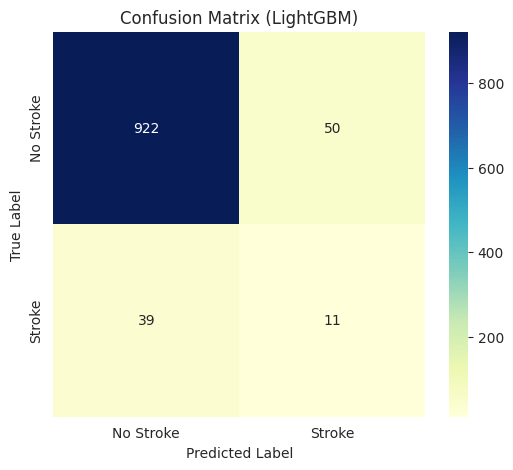

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)
# Import the LightGBM library
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

# Separate rows where 'smoking_status' is known and unknown
df_known = df[df['smoking_status'] != 2].copy()
df_unknown = df[df['smoking_status'] == 2].copy()

# For unknown smoking status and age < 20, assume status is 'never smoked' (0)
df_unknown_under20 = df_unknown[df_unknown['age'] < 20].copy()
df_unknown_under20['smoking_status'] = 0

# For unknown smoking status and age >= 20, predict using model
df_unknown_over20 = df_unknown[df_unknown['age'] >= 20].copy()

if not df_unknown_over20.empty:
    # Select features excluding 'stroke' and 'smoking_status'
    features_for_smoking_model = [col for col in df_known.columns if col not in ['stroke', 'smoking_status']]

    # Prepare data for training the model
    X_known = df_known[features_for_smoking_model]
    y_known = df_known['smoking_status']

    # Train a Random Forest Classifier to predict smoking status
    smoking_model = RandomForestClassifier(random_state=42)
    smoking_model.fit(X_known, y_known)

    # Predict unknown smoking statuses
    X_unknown_over20 = df_unknown_over20[features_for_smoking_model]
    predicted_smoking_status = smoking_model.predict(X_unknown_over20)
    df_unknown_over20['smoking_status'] = predicted_smoking_status

# Combine all parts back into one complete DataFrame
df_imputed = pd.concat([df_known, df_unknown_under20, df_unknown_over20], ignore_index=True)


# --- 2. Split into features (X) and target (y), and then train-test split ---
X = df_imputed.drop('stroke', axis=1)
y = df_imputed['stroke']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# --- 3. Train LightGBM model using scale_pos_weight to handle imbalance ---
# Instead of resampling, use the class weight to emphasize the minority class.
# Compute weight = (count of non-stroke) / (count of stroke)
count_class_0 = y_train.value_counts()[0]
count_class_1 = y_train.value_counts()[1]
scale_pos_weight_value = count_class_0 / count_class_1

print(f"--- Training LightGBM Model (scale_pos_weight: {scale_pos_weight_value:.2f}) ---")

lgb_model = lgb.LGBMClassifier(random_state=42, scale_pos_weight=scale_pos_weight_value)
lgb_model.fit(X_train, y_train)


# --- 4. Prediction and Performance Evaluation ---
y_pred_lgb = lgb_model.predict(X_test)
y_pred_proba_lgb = lgb_model.predict_proba(X_test)[:, 1]

print("\n--- LightGBM Model Performance Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lgb):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_lgb):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lgb, target_names=['No Stroke', 'Stroke']))

# Confusion matrix visualization
conf_matrix_lgb = confusion_matrix(y_test, y_pred_lgb)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_lgb, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix (LightGBM)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
